Deflategate 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

football=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/deflategate.csv")
football

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
5,Patriots,11.60,11.95
6,Patriots,11.85,12.30
7,Patriots,11.10,11.55
8,Patriots,10.95,11.35
9,Patriots,10.50,10.90


In [28]:
sum1=football.iloc[:,1]
sum2=football.iloc[:,2]
combo=(sum1+sum2)/2
football["Combined"]=combo
football.drop(columns=["Blakeman","Prioleau"],inplace=True)
football

,Team,Combined
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275
5,Patriots,11.775
6,Patriots,12.075
7,Patriots,11.325
8,Patriots,11.150
9,Patriots,10.700


In [29]:
np.ones(11)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [31]:
drop = start - football['Combined']
football['Pressure Drop']=drop
football

,Team,Combined,Pressure Drop
0,Patriots,11.650,0.850
1,Patriots,11.025,1.475
2,Patriots,11.325,1.175
3,Patriots,10.850,1.650
4,Patriots,11.275,1.225
5,Patriots,11.775,0.725
6,Patriots,12.075,0.425
7,Patriots,11.325,1.175
8,Patriots,11.150,1.350
9,Patriots,10.700,1.800


In [33]:
football=football.drop(columns="Combined")
football.groupby(by='Team').mean()

,Pressure Drop
Team,
Colts,0.468750
Patriots,1.202273


Test Statistic 

In [34]:
observed_means = football.groupby(by='Team').mean()
observed_difference =observed_means.iloc[1,0]-observed_means.iloc[0,0]
observed_difference

0.733522727272728

In [35]:
def difference_of_means(table, label, group_label):
    reduced = table[[label, group_label]]
    means_table1 = reduced.groupby(by=group_label).mean()   
    return means_table1.iloc[1,0]-means_table1.iloc[0,0]

In [36]:
difference_of_means(football, 'Pressure Drop', 'Team')

0.733522727272728

Predicting the Statistic Under the Null Hypothesis 

In [40]:
shuffled_labels = football['Team'].sample(frac=1).reset_index(drop=True)
football["Shuffled Labels"]=shuffled_labels
original_and_shuffled=football.loc[:,['Team','Pressure Drop','Shuffled Labels']]
original_and_shuffled

,Team,Pressure Drop,Shuffled Labels
0,Patriots,0.850,Colts
1,Patriots,1.475,Patriots
2,Patriots,1.175,Patriots
3,Patriots,1.650,Patriots
4,Patriots,1.225,Colts
5,Patriots,0.725,Patriots
6,Patriots,0.425,Patriots
7,Patriots,1.175,Colts
8,Patriots,1.350,Patriots
9,Patriots,1.800,Patriots


In [44]:
difference_of_means(original_and_shuffled, 'Pressure Drop', 'Shuffled Labels')

0.10284090909090948

In [43]:
difference_of_means(original_and_shuffled, 'Pressure Drop', 'Team')

0.733522727272728

Permutation Test

In [45]:
def one_simulated_difference(table, label, group_label):
    table=table[[label,group_label]]
    shuffled_labels = table[group_label].sample(frac=1).reset_index(drop=True)
    table["Shuffled Labels"]=shuffled_labels 
    shuffled_table=table
    return difference_of_means(shuffled_table, label, 'Shuffled Labels')   

In [46]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(football, 'Pressure Drop', 'Team')
    differences = np.append(differences, new_difference)                               

In [47]:
differences

array([-0.19545455, -0.49375   , -0.38295455, ...,  0.17954545,
       -0.18693182,  0.21363636])

Conclusion of the Test 

In [48]:
empirical_P = np.count_nonzero(differences >= observed_difference) / 10000
empirical_P

0.0011

Observed Difference: 0.733522727272728
Empirical P-value: 0.0011


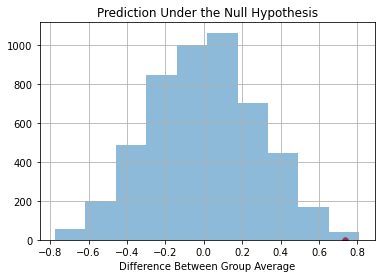

In [52]:
#######
pd.DataFrame({'Difference Between Group Averages': differences}).hist(alpha=0.5)
plt.scatter(observed_difference, 0, color='red', s=30)
plt.title('Prediction Under the Null Hypothesis')
plt.xlabel("Difference Between Group Average")
print('Observed Difference:', observed_difference)
print('Empirical P-value:', empirical_P)

Causality 

In [53]:
bta=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/bta.csv")
bta

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [54]:
bta.groupby(by='Group').mean()

,Result
Group,
Control,0.125
Treatment,0.600


In [56]:
observed_outcomes=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/observed_outcomes.csv")
observed_outcomes

,Group,Outcome if assigned treatment,Outcome if assigned control
0,Control,Unknown,1
1,Control,Unknown,1
2,Control,Unknown,0
3,Control,Unknown,0
4,Control,Unknown,0
5,Control,Unknown,0
6,Control,Unknown,0
7,Control,Unknown,0
8,Control,Unknown,0
9,Control,Unknown,0


In [58]:
sun=bta.groupby(by='Group').mean()
sun

,Result
Group,
Control,0.125
Treatment,0.600


In [60]:
sun.iloc[1,0]

0.6

In [61]:
observed_distance = abs(sun.iloc[0,0] - sun.iloc[1,0])
observed_distance

0.475

In [128]:
def distance(table, label, group_label):
    reduced = table[[label, group_label]]
    proportions = reduced.groupby(by=group_label).mean()
    return abs(proportions.iloc[0,0] - proportions.iloc[1,0])

In [129]:
#bta

In [130]:
distance(bta, 'Result', 'Group')

0.475

In [131]:
shuffled_labels = bta['Group'].sample(frac=1).reset_index(drop=True)
#shuffled_labels

In [132]:
bta['Shuffled Label']=shuffled_labels
bta_with_shuffled_labels=bta
bta_with_shuffled_labels

,Group,Result,Shuffled Label
0,Control,1.0,Control
1,Control,1.0,Treatment
2,Control,0.0,Control
3,Control,0.0,Treatment
4,Control,0.0,Treatment
5,Control,0.0,Treatment
6,Control,0.0,Treatment
7,Control,0.0,Treatment
8,Control,0.0,Control
9,Control,0.0,Control


In [133]:
distance(bta_with_shuffled_labels, 'Result', 'Shuffled Label')

0.08750000000000002

In [134]:
distance(bta_with_shuffled_labels, 'Result', 'Group')

0.475

Permutation Test

In [154]:
def one_simulated_difference(table, label, group_label):
    table=table[[label,group_label]]
    shuffled_labels = table[group_label].sample(frac=1).reset_index(drop=True)
    table["Shuffled Labels"]=shuffled_labels 
    shuffled_table=table
    return difference_of_means(shuffled_table, label, 'Shuffled Labels')   

In [155]:
#one_simulated_difference(bta_with_shuffled_labels, 'Result', 'Group')

In [156]:
distances = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_distances = one_simulated_difference(bta, 'Result', 'Group')
    distances = np.append(distances, new_distances)

In [157]:
#plt.hist(distances)

Conclusion of the Test

In [158]:
empirical_P = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_P

0.0082

Observed Distance 0.475
Empirical P-value: 0.8200000000000001 %


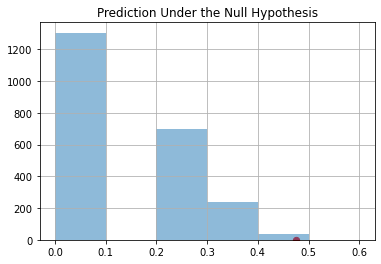

In [159]:
pd.DataFrame({'Distance': distances}).hist(bins = np.arange(0, 0.7, 0.1),alpha=0.5)
plt.scatter(observed_distance, 0, color='red', s=40)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)
print('Empirical P-value:', empirical_P *100, '%')